# Facial Feature Detection with OpenFace

This notebook uses an open source project [OpenFace](https://github.com/TadasBaltrusaitis/OpenFace) by Tadas Baltrusaitis to detect and track multi-person head motions and facial muscle movements on a given Youtube video.

In [3]:
import os
from os.path import exists, join, basename, splitext

################# Need to revert back to CUDA 10.0 ##################
# Thanks to http://aconcaguasci.blogspot.com/2019/12/setting-up-cuda-100-for-mxnet-on-google.html
#Uninstall the current CUDA version
!apt-get --purge remove cuda nvidia* libnvidia-*
!dpkg -l | grep cuda- | awk '{print $2}' | xargs -n1 dpkg --purge
!apt-get remove cuda-*
!apt autoremove
!apt-get update

#Download CUDA 10.0
!wget  --no-clobber https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/cuda-repo-ubuntu1804_10.0.130-1_amd64.deb
#install CUDA kit dpkg
!dpkg -i cuda-repo-ubuntu1804_10.0.130-1_amd64.deb
!sudo apt-key adv --fetch-keys https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/7fa2af80.pub
!apt-get update
!apt-get install cuda-10-0
#Slove libcurand.so.10 error
!wget --no-clobber http://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64/nvidia-machine-learning-repo-ubuntu1804_1.0.0-1_amd64.deb
#-nc, --no-clobber: skip downloads that would download to existing files.
!apt install ./nvidia-machine-learning-repo-ubuntu1804_1.0.0-1_amd64.deb
!apt-get update
####################################################################

git_repo_url = 'https://github.com/TadasBaltrusaitis/OpenFace.git'
project_name = splitext(basename(git_repo_url))[0]
# clone openface
!git clone -q --depth 1 $git_repo_url

# install new CMake becaue of CUDA10
!wget -q https://cmake.org/files/v3.13/cmake-3.13.0-Linux-x86_64.tar.gz
!tar xfz cmake-3.13.0-Linux-x86_64.tar.gz --strip-components=1 -C /usr/local

# Get newest GCC
!sudo apt-get update
!sudo apt-get install build-essential 
!sudo apt-get install g++-8

#added 5/15/2022. Thanks to @weskhoo
!sudo apt-key del 7fa2af80
!sudo apt-key adv --fetch-keys http://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64/3bf863cc.pub

# install python dependencies
!pip install -q yt-dlp

# Finally, actually install OpenFace
!cd OpenFace && bash ./download_models.sh && sudo bash ./install.sh

Streaming output truncated to the last 5000 lines.
    inlined from ‘void opencv_caffe::SolverState::SharedCtor()’ at /content/OpenFace/opencv-4.1.0/modules/dnn/misc/caffe/opencv-caffe.pb.cc:11696:11,
    inlined from ‘opencv_caffe::SolverState::SolverState()’ at /content/OpenFace/opencv-4.1.0/modules/dnn/misc/caffe/opencv-caffe.pb.cc:11673:13,
    inlined from ‘void protobuf_opencv_2dcaffe_2eproto::InitDefaultsSolverStateImpl()’ at /content/OpenFace/opencv-4.1.0/modules/dnn/misc/caffe/opencv-caffe.pb.cc:11668:1:
/usr/include/x86_64-linux-gnu/bits/string_fortified.h:71:33: warning: ‘void* __builtin_memset(void*, int, long unsigned int)’ offset [61, 64] from the object at ‘opencv_caffe::_SolverState_default_instance_’ is out of the bounds of referenced subobject ‘opencv_caffe::SolverState::iter_’ with type ‘int’ at offset 56 [-Warray-bounds]
   71 |   return __builtin___memset_chk (__dest, __ch, __len, __bos0 (__dest));
      |          ~~~~~~~~~~~~~~~~~~~~~~~^~~~~~~~~~~~~~~~~~~~~~~~~~~

## Detect facial expressions on a test video

We are going to detect facial features on the following Youtube video:

In [21]:
def show_local_mp4_video(file_name, width=640, height=480):
  import io
  import base64
  from IPython.display import HTML
  video_encoded = base64.b64encode(io.open(file_name, 'rb').read())
  return HTML(data='''<video width="{0}" height="{1}" alt="test" controls>
                        <source src="data:video/mp4;base64,{2}" type="video/mp4" />
                      </video>'''.format(width, height, video_encoded.decode('ascii')))

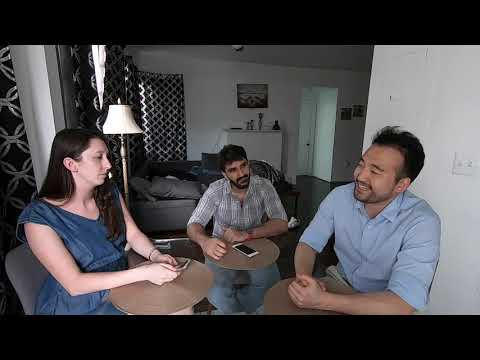

In [2]:
from IPython.display import YouTubeVideo

YOUTUBE_ID = 'XtA6FQz8BHQ'
YouTubeVideo(YOUTUBE_ID)

In [20]:
%%capture
!rm -rf youtube.mp4
# download the youtube with the given ID
!yt-dlp -f 'bestvideo[ext=mp4]' --output "youtube.%(ext)s" https://www.youtube.com/watch?v=$YOUTUBE_ID
# cut the first 5 seconds
!ffmpeg -y -loglevel info -i youtube.mp4 -t 10 video.mp4
# clear any previous outputs.
!rm -rf processed
# detect poses on the these 10 seconds.
!./OpenFace/build/bin/FaceLandmarkVidMulti -f video.mp4 -out_dir processed
# convert the result into MP4
!ffmpeg -y -loglevel info -i /content/processed/video.avi output.mp4

Finally, visualize the result:

In [22]:
show_local_mp4_video('output.mp4', width=960, height=720)

Output hidden; open in https://colab.research.google.com to view.

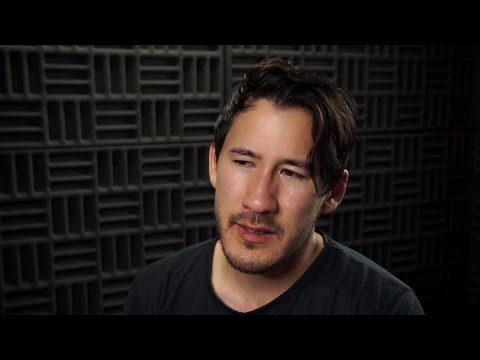

In [14]:
YOUTUBE_ID_1 = 'fd-VFBOOL5c'
YouTubeVideo(YOUTUBE_ID_1)

In [18]:
%%capture
!rm -rf youtube.mp4
# download the youtube with the given ID
!yt-dlp -f 'bestvideo[ext=mp4]' --output "youtube.%(ext)s" https://www.youtube.com/watch?v=$YOUTUBE_ID_1
# cut the first 5 seconds
!ffmpeg -y -loglevel info -i youtube.mp4 -t 10 video.mp4
# clear any previous outputs.
!rm -rf processed
# detect poses on the these 10 seconds.
!./OpenFace/build/bin/FeatureExtraction -f video.mp4 -out_dir processed
# convert the result into MP4
!ffmpeg -y -loglevel info -i /content/processed/video.avi markiplier.mp4

In [19]:
show_local_mp4_video('markiplier.mp4', width=960, height=720)

Output hidden; open in https://colab.research.google.com to view.

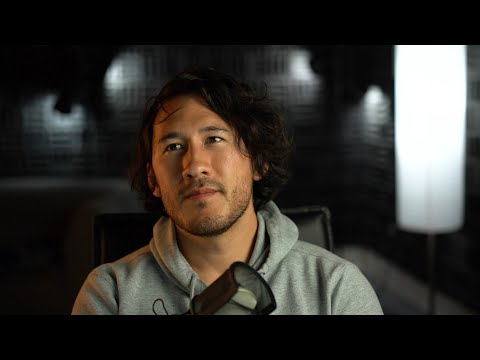

In [23]:
YOUTUBE_ID_2 = '4DY7htuJWG8'
YouTubeVideo(YOUTUBE_ID_2)

In [24]:
%%capture
!rm -rf youtube.mp4
# download the youtube with the given ID
!yt-dlp -f 'bestvideo[ext=mp4]' --output "youtube.%(ext)s" https://www.youtube.com/watch?v=$YOUTUBE_ID_2
# cut the first 5 seconds
!ffmpeg -y -loglevel info -i youtube.mp4 -t 10 video.mp4
# clear any previous outputs.
!rm -rf processed
# detect poses on the these 10 seconds.
!./OpenFace/build/bin/FeatureExtraction -f video.mp4 -out_dir processed
# convert the result into MP4
!ffmpeg -y -loglevel info -i /content/processed/video.avi markiplier2.mp4

In [25]:
show_local_mp4_video('markiplier2.mp4', width=960, height=720)

Output hidden; open in https://colab.research.google.com to view.

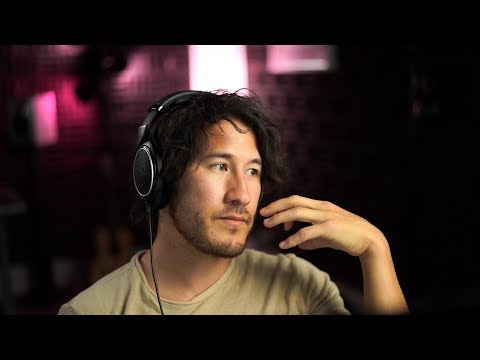

In [26]:
YOUTUBE_ID_3 = 'TEUfUXnwRPk'
YouTubeVideo(YOUTUBE_ID_3)

In [28]:
%%capture
!rm -rf youtube.mp4
# download the youtube with the given ID
!yt-dlp -f 'bestvideo[ext=mp4]' --output "youtube.%(ext)s" https://www.youtube.com/watch?v=$YOUTUBE_ID_3
# cut the first 5 seconds
!ffmpeg -y -loglevel info -i youtube.mp4 -t 10 video.mp4
# clear any previous outputs.
!rm -rf processed
# detect poses on the these 10 seconds.
!./OpenFace/build/bin/FeatureExtraction -f video.mp4 -out_dir processed
# convert the result into MP4
!ffmpeg -y -loglevel info -i /content/processed/video.avi markiplier3.mp4

In [29]:
show_local_mp4_video('markiplier3.mp4', width=960, height=720)

Output hidden; open in https://colab.research.google.com to view.